<a href="https://colab.research.google.com/github/douglas-ods/microdados-enem-2021/blob/main/microdados_enem_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
pd.set_option("display.float_format",lambda x: '%.3f'% x)

In [82]:
dataset = pd.read_csv("/content/MICRODADOS_ENEM_2021.csv",encoding="latin8",delimiter=";")
dataset.head(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A


In [83]:
dataset.shape

(802341, 76)

In [84]:
colunas_selecionadas = ['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO',
'Q001','Q002','Q006','Q022','Q024','Q025']

In [85]:
dataset_filtrado = dataset.filter(items=colunas_selecionadas)

In [86]:
dataset_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802341 entries, 0 to 802340
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_INSCRICAO     802341 non-null  int64  
 1   TP_FAIXA_ETARIA  802341 non-null  int64  
 2   TP_SEXO          802341 non-null  object 
 3   TP_COR_RACA      802341 non-null  int64  
 4   TP_ESCOLA        802341 non-null  int64  
 5   NU_NOTA_CN       601853 non-null  float64
 6   NU_NOTA_CH       631104 non-null  float64
 7   NU_NOTA_LC       631104 non-null  float64
 8   NU_NOTA_MT       601853 non-null  float64
 9   NU_NOTA_REDACAO  631104 non-null  float64
 10  Q001             802339 non-null  object 
 11  Q002             802339 non-null  object 
 12  Q006             802339 non-null  object 
 13  Q022             802339 non-null  object 
 14  Q024             802339 non-null  object 
 15  Q025             802339 non-null  object 
dtypes: float64(5), int64(4), object(7)
mem

# A retirada de entradas vazias do DataFrame, ou seja, de inscritos que não participaram de uma ou mais fases do exame, é necessária porque o objetivo deste trabalho é validar conexões entre as características dos participantes e o desempenho.

In [87]:
dataset_filtrado.isnull().sum()

NU_INSCRICAO            0
TP_FAIXA_ETARIA         0
TP_SEXO                 0
TP_COR_RACA             0
TP_ESCOLA               0
NU_NOTA_CN         200488
NU_NOTA_CH         171237
NU_NOTA_LC         171237
NU_NOTA_MT         200488
NU_NOTA_REDACAO    171237
Q001                    2
Q002                    2
Q006                    2
Q022                    2
Q024                    2
Q025                    2
dtype: int64

In [88]:
dataset_filtrado = dataset_filtrado.dropna()

In [89]:
dataset_filtrado.isnull().sum()

NU_INSCRICAO       0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_COR_RACA        0
TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
Q001               0
Q002               0
Q006               0
Q022               0
Q024               0
Q025               0
dtype: int64

In [90]:
dic_faixa_etaria = {1:"Menor de 17anos",
                    2:"17anos",
                    3:"18anos",
                    4:"19anos",
                    5:"20anos",
                    6:"21anos",
                    7:"22anos",
                    8:"23anos",
                    9:"24anos",
                    10:"25anos",
                    11:"Entre 26 e 30anos",
                    12:"Entre 31 e 35anos",
                    13:"Entre 36 e 40anos",
                    14:"Entre 41 e 45anos",
                    15:"Entre 46 e 50anos",
                    16:"Entre 51 e 55anos",
                    17:"Entre 56 e 60anos",
                    18:"Entre 61 e 65anos",
                    19:"Entre 66 e 70anos",
                    20:"Maior que 70anos"}

In [91]:
dataset_filtrado["TP_FAIXA_ETARIA"] = dataset_filtrado["TP_FAIXA_ETARIA"].map(dic_faixa_etaria)

In [65]:
# dataset_filtrado["IDADE"] = "NA"
# dataset_filtrado["IDADE"] = dataset_filtrado["TP_FAIXA_ETARIA"].apply(lambda x: "Menor de 17 anos" if x==1 else "17 anos" if x==2 else "18 anos" if x==3 else "19 anos" if x==4 else "20 anos" if x==5 else "21 anos" if x==6 else "22 anos" if x==7 else "23 anos" if x==8 else "24 anos" if x==9 else "25 anos" if x==10 else "Entre 26 e 30 anos" if x==11 else "Entre 31 anos e 35 anos" if x==12 "Entre 36 e 40 anos" if x==13 else "Entre 41 anos e 45 anos" if x==14 else "Entre 46 anos e 50 anos" if x==15 else "Entre 51 anos e 55 anos" if x==16 else "Entre 56 anos e 60 anos" if x==17 else "Entre 61 e 65 anos" if x==18 else "Entre 66 anos e 70 anos" if x==19 else "Maior de 70 anos")

In [92]:
num_escritos_faixa_etaria = dataset_filtrado[["NU_INSCRICAO","TP_FAIXA_ETARIA"]].groupby(["TP_FAIXA_ETARIA"]).count().reset_index()
num_escritos_faixa_etaria
num_escritos_faixa_etaria.sort_values("NU_INSCRICAO",ascending=False).head(5)

,TP_FAIXA_ETARIA,NU_INSCRICAO
1,18anos,169494
0,17anos,156668
2,19anos,76639
19,Menor de 17anos,45118
3,20anos,41544


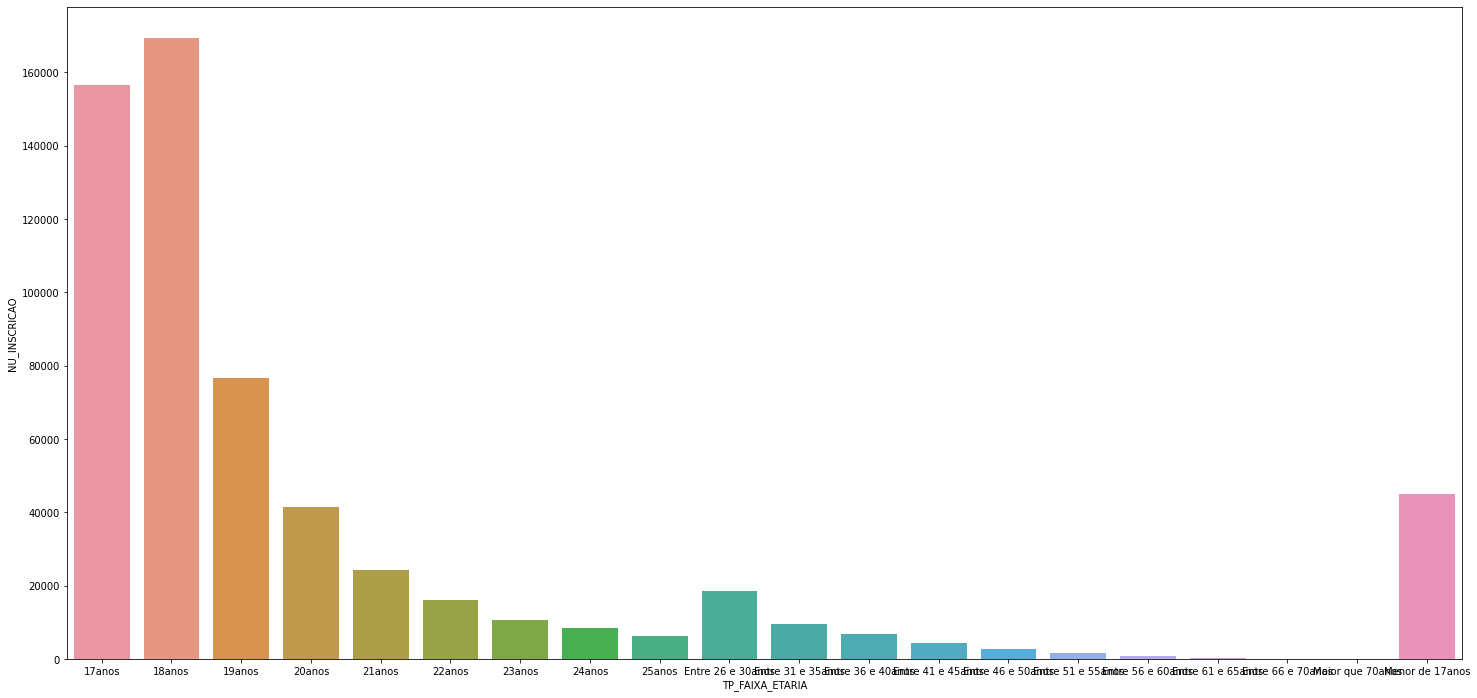

In [93]:
plt.figure(figsize=(25,12))
sns.barplot(x="TP_FAIXA_ETARIA",y="NU_INSCRICAO",data=num_escritos_faixa_etaria)
plt.show()


No exame é permitida a participação de candidatos de quase todas as idades.Apesar da grande abrangência de idades, temos algumas ocorrências mais comuns, a mediana das idades dos participantes é de 18 anos. Como é mostrado no histograma acima,
podemos perceber que a maioria dos candidatos (75%) estão entre 17 e 19 anos. 

In [94]:
dataset_filtrado.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [95]:
# Media das notas por idade
media_notas_por_idade = dataset_filtrado[["TP_FAIXA_ETARIA","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"]].groupby(["TP_FAIXA_ETARIA"]).mean().reset_index()
media_notas_por_idade["MEDIA_NOTA"] = (media_notas_por_idade["NU_NOTA_CN"] + media_notas_por_idade["NU_NOTA_CH"] + media_notas_por_idade["NU_NOTA_LC"] + media_notas_por_idade["NU_NOTA_MT"]) / 4
media_notas_por_idade

,TP_FAIXA_ETARIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,MEDIA_NOTA
0,17anos,486.005,520.547,506.088,536.198,512.210
1,18anos,483.839,517.383,501.534,527.374,507.532
2,19anos,488.520,519.662,501.994,529.327,509.876
3,20anos,493.938,524.120,503.459,532.833,513.588
4,21anos,497.294,527.580,504.867,533.901,515.910
5,22anos,498.790,531.825,506.775,535.304,518.174
6,23anos,498.247,531.998,506.422,531.684,517.088
7,24anos,497.818,531.851,505.229,531.962,516.715
8,25anos,497.246,533.970,505.740,528.573,516.382
9,Entre 26 e 30anos,498.766,538.118,505.652,525.530,517.017


In [96]:
media_notas_por_idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_FAIXA_ETARIA  20 non-null     object 
 1   NU_NOTA_CN       20 non-null     float64
 2   NU_NOTA_CH       20 non-null     float64
 3   NU_NOTA_LC       20 non-null     float64
 4   NU_NOTA_MT       20 non-null     float64
 5   MEDIA_NOTA       20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


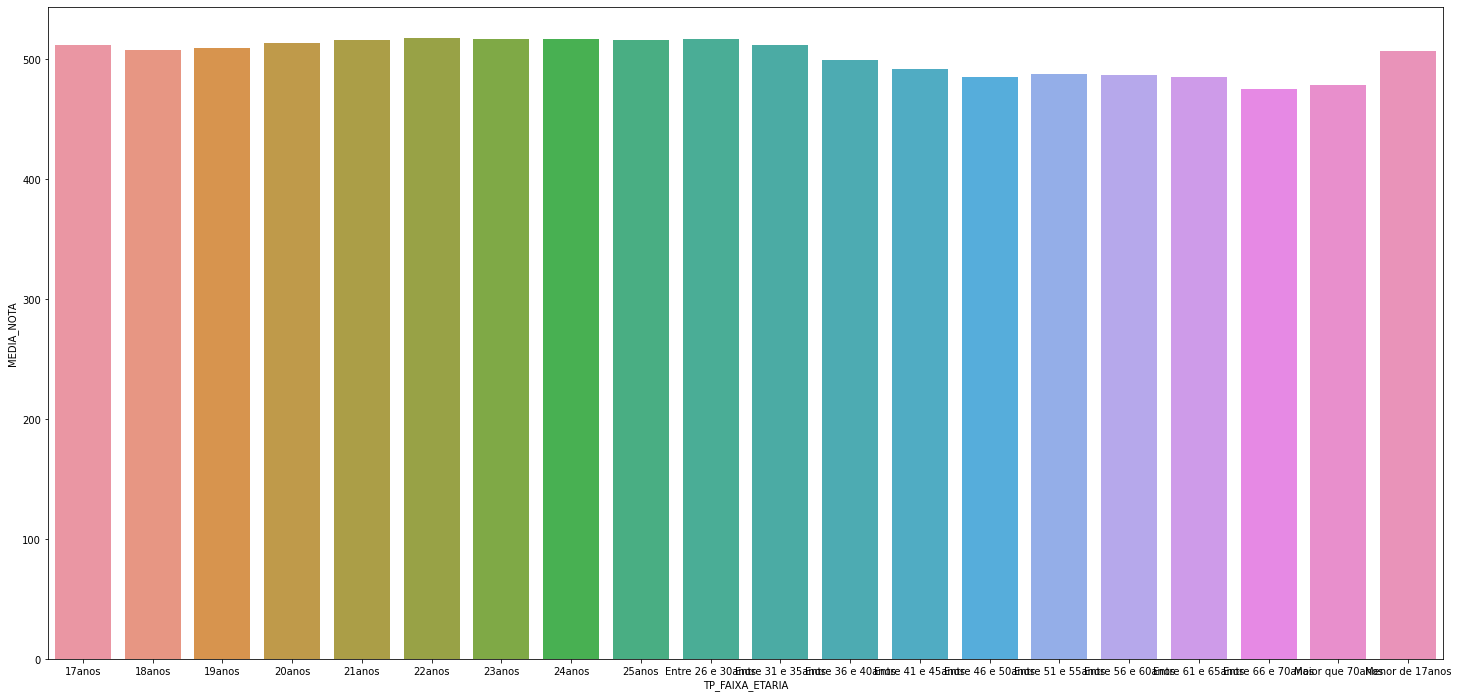

In [97]:
plt.figure(figsize=(25,12))
sns.barplot(x="TP_FAIXA_ETARIA",y="MEDIA_NOTA",data=media_notas_por_idade)
plt.show()

# Como podemos ver no histograma acima, a idade não parece afetar significativamente a pontuação do exame. Embora a densidade de cada faixa etária varie, os valores médios das notas são consistentemente mantidos em todas elas.

# Sexo

In [98]:
dataset_filtrado.shape 

(600155, 16)

O desempenho dos participantes é examinado nesta etapa por gênero. Temos 1541569 registros no dataset , dos quais 992351 correspondem a participantes do sexo feminino e 549218 participantes do sexo masculino. A distribuição dos candidatos por sexo é apresentada abaixo.

In [99]:
candidatos_por_sexo = dataset_filtrado.groupby("TP_SEXO")["NU_INSCRICAO"].count()
candidatos_por_sexo

TP_SEXO
F    411651
M    188504
Name: NU_INSCRICAO, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfeba77b80>],
      dtype=object)

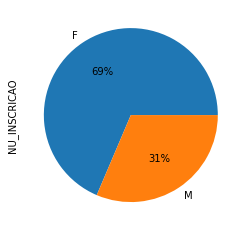

In [100]:
candidatos_por_sexo.plot.pie(subplots=True,y="NU_INSCRICAO",autopct='%1.0f%%')

In [101]:
dataset_filtrado.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [102]:
desempenho_nota_por_sexo = dataset_filtrado.groupby("TP_SEXO")["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"].mean().reset_index()
desempenho_nota_por_sexo.columns = ["Sexo","C.Natureza","C.Humanas","L.Codigos","Matematica","Redacao"]
desempenho_nota_por_sexo

<ipython-input-102-ab34690f8a92>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  desempenho_nota_por_sexo = dataset_filtrado.groupby("TP_SEXO")["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"].mean().reset_index()


,Sexo,C.Natureza,C.Humanas,L.Codigos,Matematica,Redacao
0,F,480.385,515.816,500.506,518.596,647.497
1,M,502.917,533.175,507.838,555.169,623.515


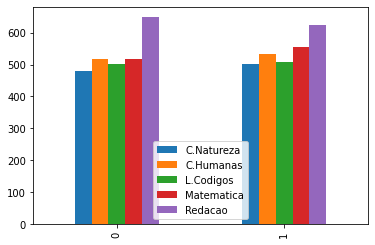

In [103]:
desempenho_nota_por_sexo.plot.bar()

 # O gráfico acima mostra que embora o número de melhores seja 69% maior, nos tópicos de ciências naturais, ciências humanas e linguagens e códigos os homens tiveram um desempenho superior de forma geral.Já na nota da Redação, as mulheres obtiveram uma média superior a dos homens.

In [104]:
desempenho_nota_por_sexo["MEDIA_GERAL"] = (desempenho_nota_por_sexo["C.Natureza"] + desempenho_nota_por_sexo["C.Humanas"]+ desempenho_nota_por_sexo["L.Codigos"] + desempenho_nota_por_sexo["Matematica"] +desempenho_nota_por_sexo["Redacao"]) / 5
desempenho_nota_por_sexo

,Sexo,C.Natureza,C.Humanas,L.Codigos,Matematica,Redacao,MEDIA_GERAL
0,F,480.385,515.816,500.506,518.596,647.497,532.560
1,M,502.917,533.175,507.838,555.169,623.515,544.523


In [105]:
px.bar(x="Sexo",y="MEDIA_GERAL",data_frame=desempenho_nota_por_sexo)

# Escola

# Esta seção mostra a distribuição e o desempenho dos participantes de acordo com o tipo de ensino médio em que cada participante se formou. As linhas do dataset em que o candidato não indicou qual escola frequentou foram eliminadas. As classificações restantes são: pública e privada.

In [106]:
dataset_filtrado["TP_ESCOLA"].unique()

array([1, 2, 3])

In [107]:
dic_tp_escola = {1:"Nao_Respondeu",2:"Publica",3:"Privada"}

In [108]:
dataset_filtrado["TP_ESCOLA"] =  dataset_filtrado["TP_ESCOLA"].map(dic_tp_escola)

In [190]:
# dataset_filtrado.groupby("TP_ESCOLA")["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"].count()
dataset_filtrado.groupby("TP_ESCOLA")["TP_ESCOLA"].count()

TP_ESCOLA
Nao_Respondeu    890826
Privada          133187
Publica          517556
Name: TP_ESCOLA, dtype: int64

In [196]:
df = dataset_filtrado.loc[(dataset_filtrado["TP_ESCOLA"]=="Publica") | (dataset_filtrado["TP_ESCOLA"] =="Privada")]
df.head(5)


,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
3,210052128335,18anos,M,3,Publica,580.700,678.900,638.900,659.500,780.000,B,B,B,B,B,B
4,210051353021,17anos,F,3,Publica,497.700,532.400,457.600,582.600,780.000,D,E,C,E,B,B
8,210053417016,23anos,F,3,Publica,487.400,476.500,450.700,493.400,520.000,B,B,B,B,A,B
9,210051128744,19anos,F,3,Publica,507.600,539.200,494.600,413.300,380.000,D,D,B,C,A,B
11,210054444526,17anos,F,1,Publica,378.500,502.700,487.700,514.900,680.000,D,D,B,C,B,B


In [198]:
candidatos_por_escola = df.groupby("TP_ESCOLA")["TP_ESCOLA"].count()
candidatos_por_escola 

TP_ESCOLA
Privada    133187
Publica    517556
Name: TP_ESCOLA, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76a9f0c2b0>],
      dtype=object)

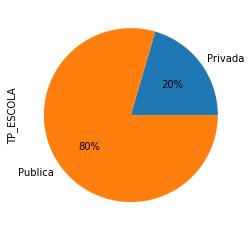

In [199]:
candidatos_por_escola.plot.pie(subplots=True,y="TP_ESCOLA",autopct='%1.0f%%')

In [213]:
desempenho_por_tp_escola = df.groupby("TP_ESCOLA")["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"].mean().reset_index()
desempenho_por_tp_escola.columns = ["Escola","C.Natureza","C.Humanas","L.Codigos","Matematica","Redacao"] 
desempenho_por_tp_escola 

<ipython-input-213-14c2e10a4ead>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  desempenho_por_tp_escola = df.groupby("TP_ESCOLA")["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"].mean().reset_index()


,Escola,C.Natureza,C.Humanas,L.Codigos,Matematica,Redacao
0,Privada,545.128,575.057,551.264,616.231,750.493
1,Publica,470.593,500.779,487.027,510.119,594.933


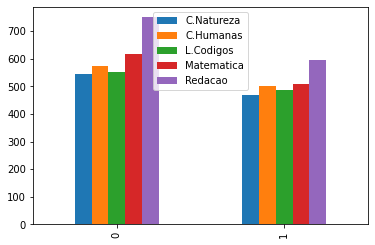

In [202]:
desempenho_por_tp_escola.plot.bar()

Observa-se no gráfico acima que as escolas da rede privada tiveram os melhores resultados em todas as provas do exame. O que mais chama atenção é o resultado  expressivo em redação se comparado com as escolas públicas.

In [214]:
desempenho_por_tp_escola["MEDIA_GERAL"] = (desempenho_por_tp_escola["C.Natureza"] + desempenho_por_tp_escola["C.Humanas"]+ desempenho_por_tp_escola["L.Codigos"] + desempenho_por_tp_escola["Matematica"] +desempenho_por_tp_escola["Redacao"]) / 5
desempenho_por_tp_escola

,Escola,C.Natureza,C.Humanas,L.Codigos,Matematica,Redacao,MEDIA_GERAL
0,Privada,545.128,575.057,551.264,616.231,750.493,607.634
1,Publica,470.593,500.779,487.027,510.119,594.933,512.690


In [219]:
px.bar(x="Escola",y="MEDIA_GERAL",data_frame=desempenho_por_tp_escola)

# Participantes por ano

In [41]:
import pandas as pd
import matplotlib . pyplot as plt
import numpy as np
from sklearn import datasets , linear_model 
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

In [42]:
dados = {'Ano':[1998 , 1999 ,2000 , 2001 , 2002 , 2003 , 2004 , 2005 , 2006 ,
2007 , 2008 , 2009 , 2010 , 2011 , 2012 , 2013 , 2014 , 2015 , 2016 , 2017 ,
2018 , 2019,2020,2021],
'Candidatos': [157221 , 346953 , 390180 , 1624131 , 1829170 ,
1882393 , 1552316 , 3004491 , 3742827 , 3584569 , 4018050 ,
4148720 , 4626094 , 5380856 , 5791065 , 7173563 , 8722248 ,
7746472 , 8627367 , 6731341 , 5513747 , 5095270,5783357,3109762]} 

In [43]:
df_enem = pd.DataFrame(dados)

In [44]:
df_enem

,Ano,Candidatos
0,1998,157221
1,1999,346953
2,2000,390180
3,2001,1624131
4,2002,1829170
5,2003,1882393
6,2004,1552316
7,2005,3004491
8,2006,3742827
9,2007,3584569


In [46]:
#x = df_enem.Ano.values.reshape(-1,1)
x = df_enem.Ano[:,np.newaxis]
x_temp = x
y = df_enem.Candidatos

#y = df_enem.Candidatos


<ipython-input-46-a5fb401c21f5>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = df_enem.Ano[:,np.newaxis]


In [47]:
# dividindo a base entre treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x_temp,y)


In [48]:
x_treino.shape, y_treino.shape

((18, 1), (18,))

In [49]:
maquina_preditiva = linear_model.LinearRegression()

In [50]:
maquina_preditiva.fit(x_treino,y_treino)

LinearRegression()

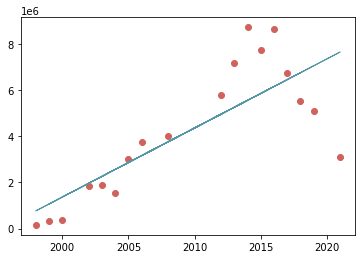

In [51]:
plt.scatter (x_treino,y_treino,color='#cf625d')
plt.plot(x_treino,maquina_preditiva.predict(x_treino ),color='#5597a6', linewidth =1)

# O treinamento com dados de treino resultou e uma linha crescente. Os dados usados ​​no modelo desta vez foram os separados para teste, então o trecho de código a seguir é uma adição ao que foi mostrado anteriormente.


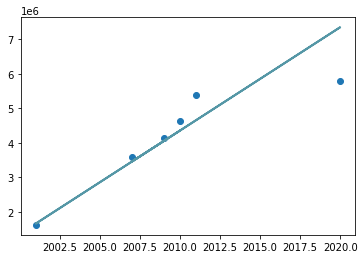

In [52]:
# Rodando modelo com dados de teste
plt.scatter (x_teste,y_teste)
plt.plot(x_teste,maquina_preditiva.predict(x_teste),color ='#5597a6',linewidth =2)

# Observa-se no mapa que tanto no dados de treino quanto no dados de teste geram una tendência de crescimento nos anos de 2006 até 2020,No ano de 2021 tem uma queda nos participantes do enem.

# Conclusão

A aplicação de conceitos de ciência de dados a dados educacionais do Brasil serviu como estrutura para este trabalho. Seu objetivo foi usar métodos estatísticos e ciência de dados para saber mais sobre os candidatos ao Exame Nacional do Ensino Médio de 2021 a partir do dataset que o Inep cedeu.
Os resultado dos dois primeiros experimentos nos permitiram concluir que nem a idade nem o sexo dos participantes são determinantes para seu desempenho.
O tipo de escola em que o participante concluiu o ensino médio foi objeto da análise seguinte. Foi possível confirmar que os alunos que frequentaram escolas particulares tiveram melhor desempenho em todas as provas do Enem.
Por fim, a partir de dados históricos dos inscritos no Enem, foram utilizadas técnicas de aprendizado de máquina para criar uma linha de tendência relativa ao número de participantes ao longo do tempo. Apesar de usar um pequeno conjunto de dados, foi capaz de obter uma visão geral do padrão de matrículas para os próximos anos. Essas análises são cruciais porque podem prever dados que ajudarão no sucesso dos próximos testes, como preocupações sobre a adequação da infraestrutura para todos os inscritos.